Перші 5 рядків:
  Country/Territory IMF[1][13]            World Bank[14]             \
  Country/Territory   Forecast       Year       Estimate       Year   
0             World  109529216       2024      105435540       2023   
1     United States   28781083       2024       27360935       2023   
2             China   18532633  [n 1]2024       17794782  [n 3]2023   
3           Germany    4591100       2024        4456081       2023   
4             Japan    4110452       2024        4212945       2023   

  United Nations[15]             
            Estimate       Year  
0          100834796       2022  
1           25744100       2022  
2           17963170  [n 1]2022  
3            4076923       2022  
4            4232173       2022  

Розмір датасета:
(210, 7)

Назви стовпців:
MultiIndex([( 'Country/Territory', 'Country/Territory'),
            (        'IMF[1][13]',          'Forecast'),
            (        'IMF[1][13]',              'Year'),
            (    'World Bank[14]'

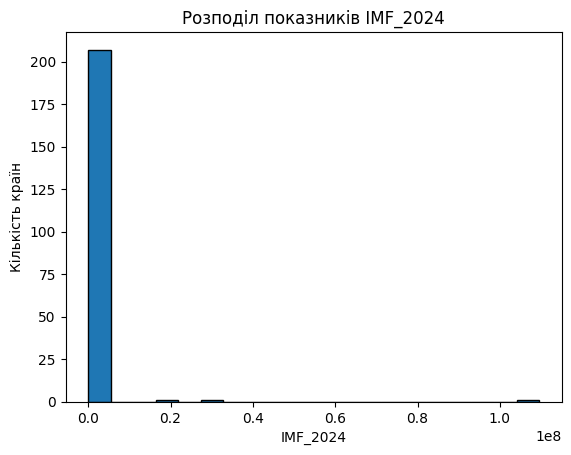


Частки країн в загальному значенні для кожного року:
              Country  Share_IMF_2024  Share_WorldBank_2023  Share_OON_2022
0               World    4.643473e-01              0.004762    4.840638e-01
1       United States    1.220169e-01              0.004762    1.256165e-01
2               China    7.856878e-02              0.004762    8.169741e-02
3             Germany    1.946389e-02              0.004762    2.045826e-02
4               Japan    1.742619e-02              0.004762    1.934200e-02
..                ...             ...                   ...             ...
205          Kiribati    1.318479e-06              0.004762    1.280914e-06
206             Palau    1.305761e-06              0.004762    1.207456e-06
207  Marshall Islands    1.293042e-06              0.004762    1.303869e-06
208             Nauru    6.825568e-07              0.004762    7.070275e-07
209            Tuvalu    2.798059e-07              0.004762    2.846475e-07

[210 rows x 4 columns]


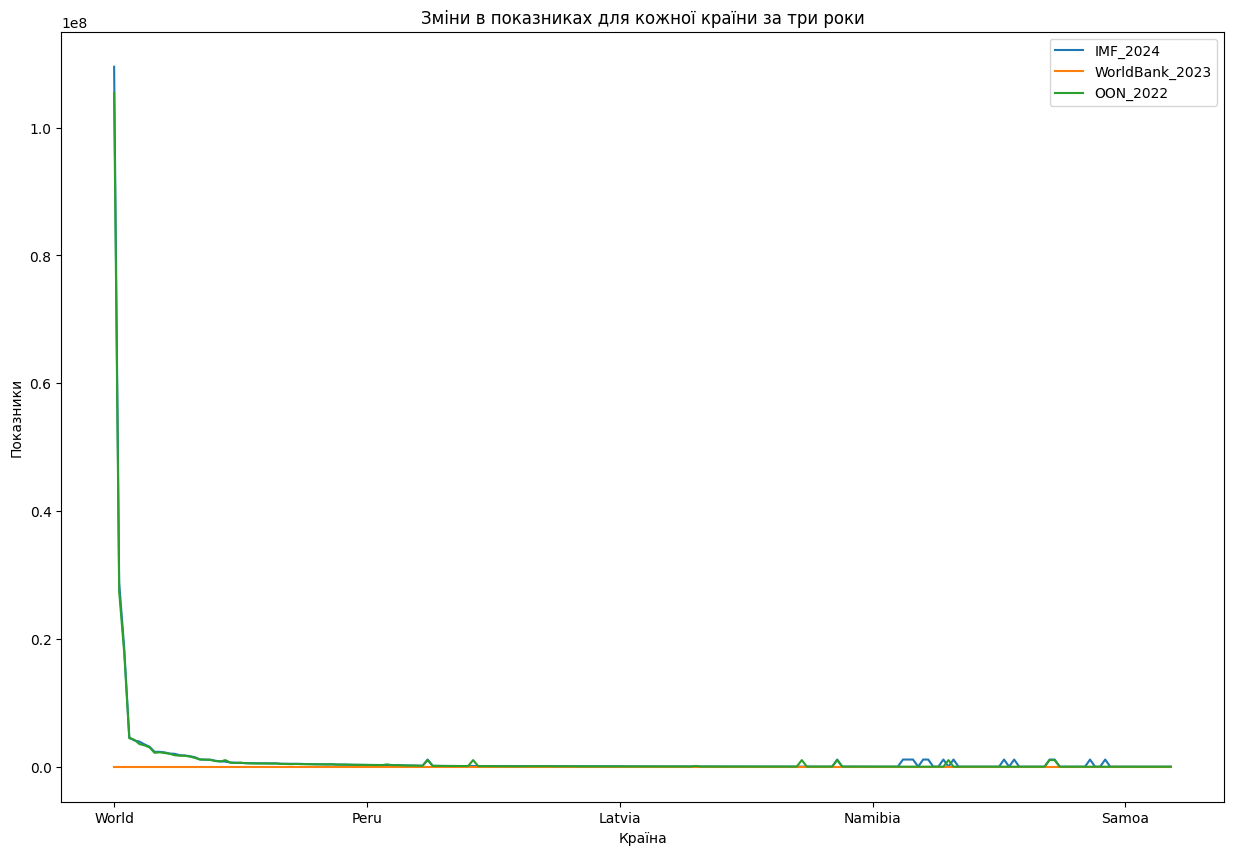

In [ ]:
import pandas as pd
import numpy as np

# Зчитування даних з Вікіпедії
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
tables = pd.read_html(url)
df = tables[2]  # Вибір потрібної таблиці

# 1. Вивести перших 5 рядків
print("Перші 5 рядків:")
print(df.head())

# 2. Визначити розмір датасета
print("\nРозмір датасета:")
print(df.shape)

# 3. Визначити оптимальну кількість стовпців
print("\nНазви стовпців:")
print(df.columns)

# Перевірка кількості стовпців
print("\nКількість стовпців у датасеті:", len(df.columns))

# 4. Змінити назви стовпців на більш зручні
# Переконайтеся, що кількість нових назв відповідає кількості стовпців у датасеті
new_column_names = ['Country', 'IMF_2024', 'WorldBank_2023', 'OON_2022', 'Extra1', 'Extra2', 'Extra3']
df.columns = new_column_names[:len(df.columns)]

# 5. Визначити тип даних
print("\nТипи даних:")
print(df.dtypes)

# 6. Замінити значення "—" на NaN
df.replace("—", np.nan, inplace=True)

# Конвертувати числові стовпці у числовий формат
df['IMF_2024'] = pd.to_numeric(df['IMF_2024'], errors='coerce')
df['WorldBank_2023'] = pd.to_numeric(df['WorldBank_2023'], errors='coerce')
df['OON_2022'] = pd.to_numeric(df['OON_2022'], errors='coerce')

# Перевірити наявність пропущених значень
print("\nПропущені значення:")
print(df.isnull().sum())

# Замінити пропущені значення на середнє значення для числових стовпців
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].apply(lambda x: x.fillna(x.mean()), axis=0)

# 7. Ще раз перевірити наявність пропущених значень
print("\nПропущені значення після заміни:")
print(df.isnull().sum())

# 8. Перевірити наявність дублікатів
print("\nДублікати:")
print(df.duplicated().sum())

# Видалити дублікати
df.drop_duplicates(inplace=True)

# 9. Вивести описову статистику
print("\nОписова статистика:")
print(df.describe())

# 10. Визначити відхилення між IMF_2024 та WorldBank_2023
df['Difference_IMF_WB'] = df['IMF_2024'] - df['WorldBank_2023']
print("\nКраїни з найбільшими відхиленнями між IMF_2024 та WorldBank_2023:")
print(df[['Country', 'Difference_IMF_WB']].sort_values(by='Difference_IMF_WB', ascending=False).head())

# 11. Обчислити кореляцію між показниками
print("\nКореляція між показниками:")
print(df[['IMF_2024', 'WorldBank_2023', 'OON_2022']].corr())

# 12. Обчислити середнє значення для кожного числового стовпця
print("\nСереднє значення для кожного числового стовпця:")
print(df[numeric_columns].mean())

# 13. Обчислити стандартне відхилення показників для кожної країни
df['Std_Dev'] = df[['IMF_2024', 'WorldBank_2023', 'OON_2022']].std(axis=1)
print("\nКраїна з найвищою варіативністю:")
print(df[['Country', 'Std_Dev']].sort_values(by='Std_Dev', ascending=False).head(1))

# 14. Визначити країну з найвищим та найнижчим показниками
print("\nКраїна з найвищим показником IMF_2024:")
print(df.loc[df['IMF_2024'].idxmax()])

print("\nКраїна з найнижчим показником IMF_2024:")
print(df.loc[df['IMF_2024'].idxmin()])

print("\nКраїна з найвищим показником WorldBank_2023:")
print(df.loc[df['WorldBank_2023'].idxmax()])

print("\nКраїна з найнижчим показником WorldBank_2023:")
print(df.loc[df['WorldBank_2023'].idxmin()])

print("\nКраїна з найвищим показником OON_2022:")
print(df.loc[df['OON_2022'].idxmax()])

print("\nКраїна з найнижчим показником OON_2022:")
print(df.loc[df['OON_2022'].idxmin()])

# 15. Побудувати гістограму для розподілу показників IMF_2024
import matplotlib.pyplot as plt

plt.hist(df['IMF_2024'], bins=20, edgecolor='k')
plt.title('Розподіл показників IMF_2024')
plt.xlabel('IMF_2024')
plt.ylabel('Кількість країн')
plt.show()

# 16. Розрахувати частку кожної країни в загальному значенні для кожного року
df['Share_IMF_2024'] = df['IMF_2024'] / df['IMF_2024'].sum()
df['Share_WorldBank_2023'] = df['WorldBank_2023'] / df['WorldBank_2023'].sum()
df['Share_OON_2022'] = df['OON_2022'] / df['OON_2022'].sum()

print("\nЧастки країн в загальному значенні для кожного року:")
print(df[['Country', 'Share_IMF_2024', 'Share_WorldBank_2023', 'Share_OON_2022']])

# 17. Візуалізувати зміни в показниках для кожної країни за три роки
df.set_index('Country')[['IMF_2024', 'WorldBank_2023', 'OON_2022']].plot(kind='line', figsize=(15, 10))
plt.title('Зміни в показниках для кожної країни за три роки')
plt.xlabel('Країна')
plt.ylabel('Показники')
plt.legend()
plt.show()


Висновок: Цей код виконує аналіз даних про ВВП країн, зібраних з Вікіпедії, за кількома джерелами (МВФ, Світовий банк, ООН). Основні кроки включають:

Зчитування таблиці з Вікіпедії та виведення перших 5 рядків даних.
Аналіз структури даних: перевірка кількості рядків і стовпців, типів даних, наявності пропущених значень і дублікатів.
Попередня обробка даних: заміна пропущених значень на середні, зміна назв стовпців, конвертація числових значень.
Обчислення різниці між даними МВФ і Світового банку, а також кореляції між показниками.
Виявлення країн з найбільшими відхиленнями, високою варіативністю та крайніми показниками ВВП.
Побудова гістограми розподілу ВВП за даними МВФ і візуалізація змін показників для кожної країни за три роки.
Таким чином, код надає вичерпний аналіз даних про ВВП країн, включаючи статистичні та графічні методи дослідження.

Перші 5 рядків:
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  

Розмір датасета:
(418, 12)

Типи даних:
PassengerId      int64
Surviv

<ipython-input-9-3c011b965300>:88: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_fare_group = data.groupby('FareGroup')['Survived'].mean() * 100


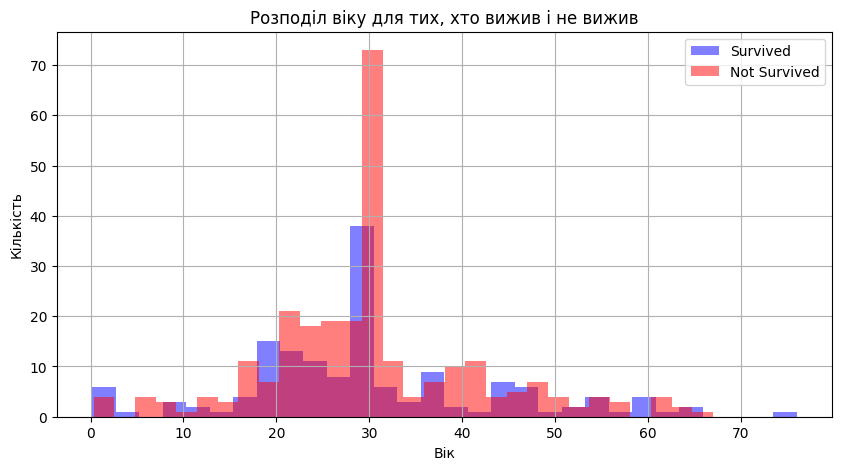


Відсоток виживання за комбінацією статі та класу:
Sex  Pclass
0    1           0.0
     2           0.0
     3           0.0
1    1         100.0
     2         100.0
     3         100.0
Name: Survived, dtype: float64

Кореляція між числовими змінними:
          Survived    Pclass       Sex       Age      Fare
Survived  1.000000 -0.108615  1.000000 -0.000011  0.191382
Pclass   -0.108615  1.000000 -0.108615 -0.440782 -0.576619
Sex       1.000000 -0.108615  1.000000 -0.000011  0.191382
Age      -0.000011 -0.440782 -0.000011  1.000000  0.326800
Fare      0.191382 -0.576619  0.191382  0.326800  1.000000


In [ ]:
import pandas as pd
import numpy as np

# Завантаження датасету
url = 'https://drive.google.com/uc?id=1tEZd30wi_ZkOKfNCPhpymOcSKtRdsupN'
data = pd.read_csv(url)

# 1. Вивести перших 5 рядків
print("Перші 5 рядків:")
print(data.head())

# 2. Визначити розмір датасета
print("\nРозмір датасета:")
print(data.shape)

# 3. Визначити тип даних
print("\nТипи даних:")
print(data.dtypes)

# 4. Визначити наявність пропущених значень. При наявності, замінити пропущені значення на середнє значення.
print("\nПропущені значення перед заміною:")
print(data.isnull().sum())

# Замінити пропущені значення на середнє значення для числових стовпців
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# 5. Ще раз перевірити наявність пропущених значень.
print("\nПропущені значення після заміни:")
print(data.isnull().sum())

# 6. Перевірити наявність дублікатів. При наявності видалити дублікати.
print("\nКількість дублікатів перед видаленням:")
print(data.duplicated().sum())

data.drop_duplicates(inplace=True)

print("\nКількість дублікатів після видалення:")
print(data.duplicated().sum())

# 7. Вивести описову статистику датасету describe()
print("\nОписова статистика:")
print(data.describe())

# 8. Видалити стовпчик Cabin
data.drop(columns=['Cabin'], inplace=True)

# 9. Сформувати датасет з обраними стовпцями
selected_columns = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']
data = data[selected_columns]

# 10. Замінити бінарні ознаки (Стать) на 0 і 1 (але перевірте унікальні значення даного стовпчика).
print("\nУнікальні значення стовпчика 'Sex':")
print(data['Sex'].unique())

data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# 11. Ще раз перевірити кількість пропущених даних (впевнитись, що їх немає).
print("\nПропущені значення після всіх змін:")
print(data.isnull().sum())

# 12. Вивести 5 перших рядків датасету.
print("\nПерші 5 рядків датасету після всіх змін:")
print(data.head())

# 13. Вивести 5 останніх рядків датасету.
print("\nОстанні 5 рядків датасету після всіх змін:")
print(data.tail())

# 14. Аналіз виживання залежно від статі
survival_by_sex = data.groupby('Sex')['Survived'].mean() * 100
print("\nВідсоток виживання за статтю:")
print(survival_by_sex)

# 15. Відсоток виживання для кожного класу (Pclass)
survival_by_class = data.groupby('Pclass')['Survived'].mean() * 100
print("\nВідсоток виживання за класом:")
print(survival_by_class)

# 16. Середній вік тих, хто вижив, і тих, хто не вижив
average_age_survived = data[data['Survived'] == 1]['Age'].mean()
average_age_not_survived = data[data['Survived'] == 0]['Age'].mean()
print("\nСередній вік тих, хто вижив:", average_age_survived)
print("Середній вік тих, хто не вижив:", average_age_not_survived)

# 17. Розподіл пасажирів на групи за рівнями тарифів (Fare) і рівень виживання для кожної групи
data['FareGroup'] = pd.qcut(data['Fare'], 4)
survival_by_fare_group = data.groupby('FareGroup')['Survived'].mean() * 100
print("\nВідсоток виживання за групами тарифів:")
print(survival_by_fare_group)

# Видалити стовпчик FareGroup перед обчисленням кореляції
data.drop(columns=['FareGroup'], inplace=True)

# 18. Середній тариф (Fare) для кожного класу (Pclass)
average_fare_by_class = data.groupby('Pclass')['Fare'].mean()
print("\nСередній тариф за класом:")
print(average_fare_by_class)

# 19. Середній вік пасажирів для кожного класу (Pclass)
average_age_by_class = data.groupby('Pclass')['Age'].mean()
print("\nСередній вік пасажирів за класом:")
print(average_age_by_class)

# 20. Гістограма розподілу віку для тих, хто вижив, і тих, хто не вижив
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
data[data['Survived'] == 1]['Age'].hist(alpha=0.5, color='blue', bins=30, label='Survived')
data[data['Survived'] == 0]['Age'].hist(alpha=0.5, color='red', bins=30, label='Not Survived')
plt.legend()
plt.title('Розподіл віку для тих, хто вижив і не вижив')
plt.xlabel('Вік')
plt.ylabel('Кількість')
plt.show()

# 21. Відсоток виживання для кожної комбінації статі та класу
survival_by_sex_class = data.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100
print("\nВідсоток виживання за комбінацією статі та класу:")
print(survival_by_sex_class)

# 22. Кореляція між усіма числовими змінними
correlation_matrix = data.corr()
print("\nКореляція між числовими змінними:")
print(correlation_matrix)


Висновок:
Виживання за статтю: Жінки мали значно вищий відсоток виживання порівняно з чоловіками.
Виживання за класом: Пасажири першого класу мали найвищий рівень виживання, тоді як пасажири третього класу - найнижчий.
Вік і виживання: Середній вік тих, хто вижив, був нижчим, ніж тих, хто не вижив.
Тариф і виживання: Вищі тарифи були пов’язані з вищими шансами на виживання.
Кореляція: Найсильніша кореляція з виживанням спостерігалася для статі та класу пасажирів.